<h1><center>Part I: From data to visualization</center></h1>

In [2]:
# DEPENDENIES
import pandas as pd
import numpy as np
# from plotnine import *
# import plotly
# import ggplot as gp
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

%matplotlib inline
# theme_set(theme_void());

# Set up parameters
titlesize = 70
labelsize = 45
plaincolor = "#212F3D"
blurcolor = "#D5D8DC"
markers = ['o','s','d', '^','v','.', ',', 'x', '+',  '<', '>']

## 2. Visualizing data: Mapping data onto aesthetics

### 2.1 Aesthetics and types of data

**Aesthetics:** shape, size, color, position, line width, line type

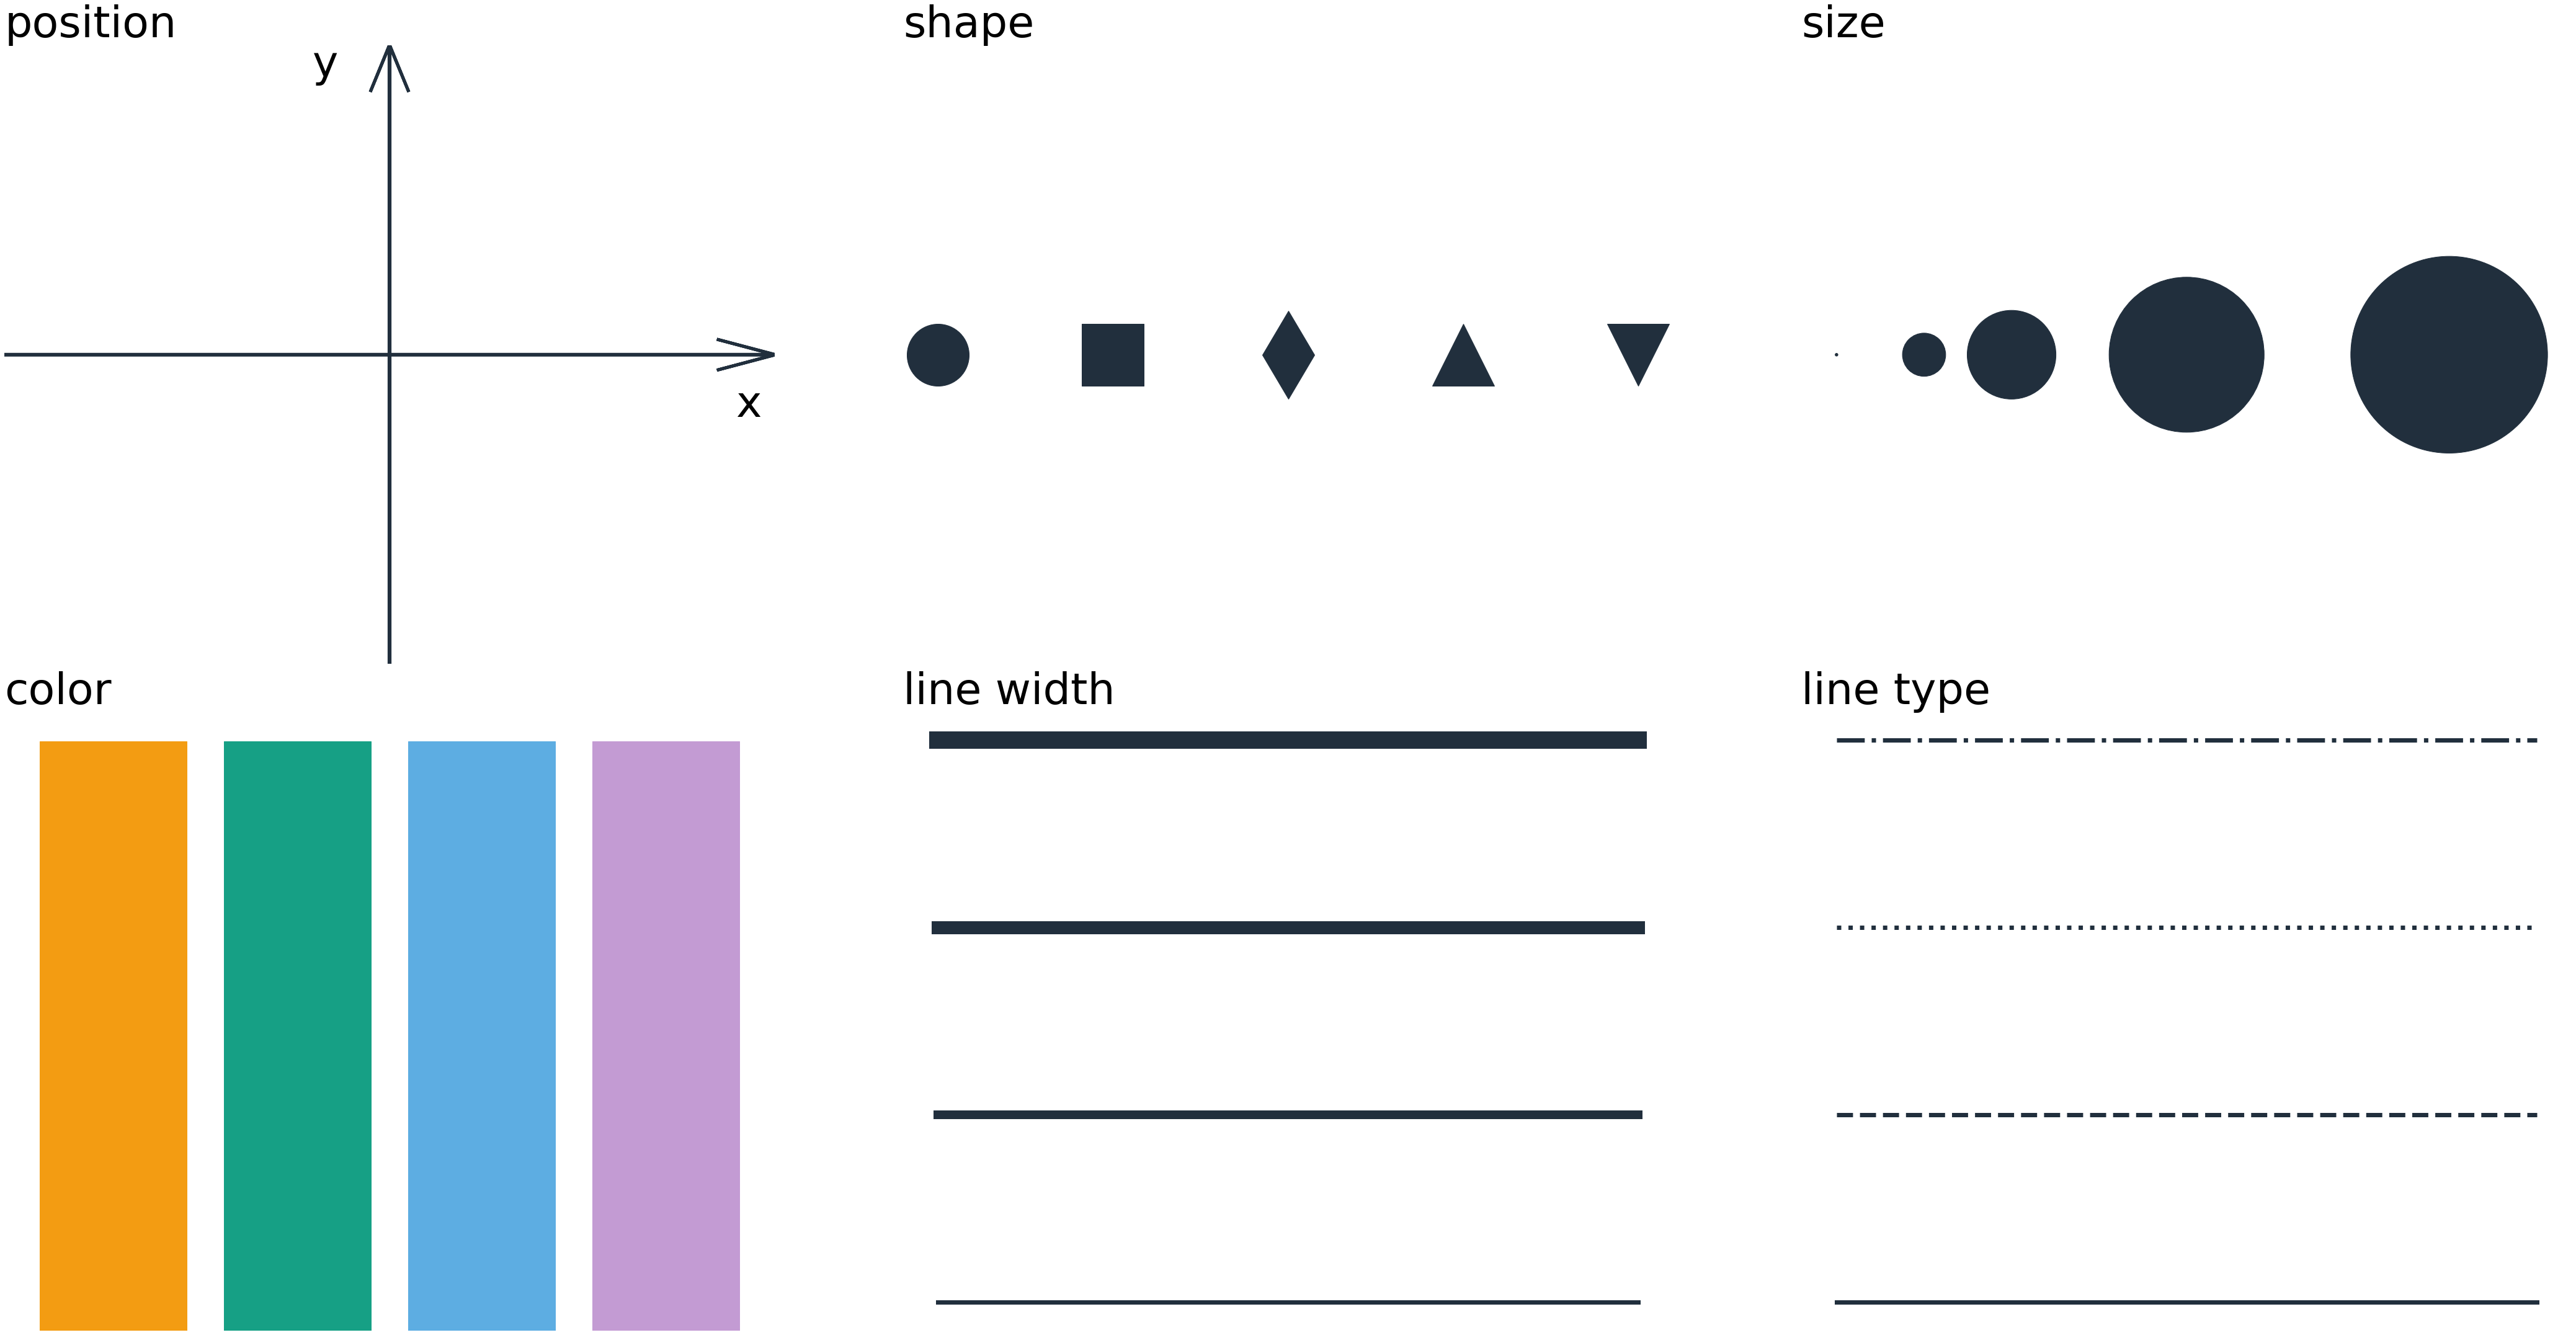

<Figure size 4320x2160 with 0 Axes>

Figure 2.1: Commonly used aesthetics in data visualization: position, shape, size, color, line width, line type.


In [3]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(60,30))
plt.figure(figsize = (60,30))

# Position
ax1.arrow(0.5,0,0,1, linewidth=5, head_width=.05, color = plaincolor, length_includes_head=True, overhang=1,fill=False)
ax1.arrow(0,0.5,1,0, linewidth=5, head_width=.05, color = plaincolor, length_includes_head=True, overhang=1,fill=False)
ax1.set_title("position",fontsize=titlesize,loc="left")
ax1.text(0.4,0.95,"y",fontsize=titlesize)
ax1.text(0.95,0.4,"x",fontsize=titlesize)
ax1.axis("off");

#Shape
x = [i for i in range(len(markers[:5]))]
y = [0]*len(x)
for i in range(len(markers[:5])):
    ax2.plot(x[i]+0.1,y[i],markers[i],markersize=100,color="#212F3D")
ax2.set_title("shape",fontsize=titlesize,loc="left")
ax2.axis("off");

#Size
x = [0,0.5,1,2,3.5,4]
y = [0]*len(x)
scale = [0,2,3,4,4.5,0]
s = [20*(n+1)**5 for n in scale]
ax3.scatter(x,y,s=s,color="#212F3D", clip_on=False)
ax3.set_title("size",fontsize=titlesize,loc="left")
ax3.axis("off");

# Color
x = ["#F39C12","#16A085","#5DADE2","#C39BD3"]
barls = ax4.bar(x,[1]*len(x))
for i in range(len(x)):
    barls[i].set_color(x[i])
ax4.set_title("color",fontsize=titlesize,loc="left")
ax4.axis("off");

#Line width
for i in range(4):
    ax5.plot([1,3],[i]*2,"-",linewidth=7*(i+1),color=plaincolor)
ax5.set_title("line width",fontsize=titlesize,loc="left")
ax5.axis("off");

# Line type
linetypes = ["-","--",":","-."]
for i in range(len(linetypes)):
    ax6.plot([1,3], [i]*2, linetypes[i], linewidth=7, color="#212F3D")
ax6.set_title("line type",fontsize=titlesize,loc="left")
ax6.axis("off");

fig.subplots_adjust(hspace=10,wspace=10)
plt.show()
print("Figure 2.1: Commonly used aesthetics in data visualization: position, shape, size, color, line width, line type.")

**All aesthetics fall into 2 groups:**
* those that can represent continuous data
* those that do not represent continuous data

**Data types in visualization:**

| Type of variable                  | Examples                                     |
|:---------------------------------:|:--------------------------------------------:|
| quantitative/numerical continuous | 1.3, 5.7, 83, 1.5x10-2                       |
| quantitative/numerical discrete   | 1, 2, 3, 4                                   |
| qualitative/categorical unordered | dog, cat, fish                               |
| qualitative/categorical ordered   | good, fair, poor                             |
| date or time                      | Jan. 5 2018, 8:03am                          |
| text                              | The quick brown fox jumps over the lazy dog. |

Example in in the **Table 2.2** below:
* Month: ordered factor
* Day: discrete numerical value
* Location: unordered factor
* Station ID: unordered factor
* Temperature: continuous numerical value

### 2.2. Scales map data values onto aesthetics

To map data values onto aesthetiics:
* Specify which data values correspond to which specific aesthetics values
* Specify which data values are represented by particular shapes or colors

=> This mapping is created via *scales* (must be one-to-one)

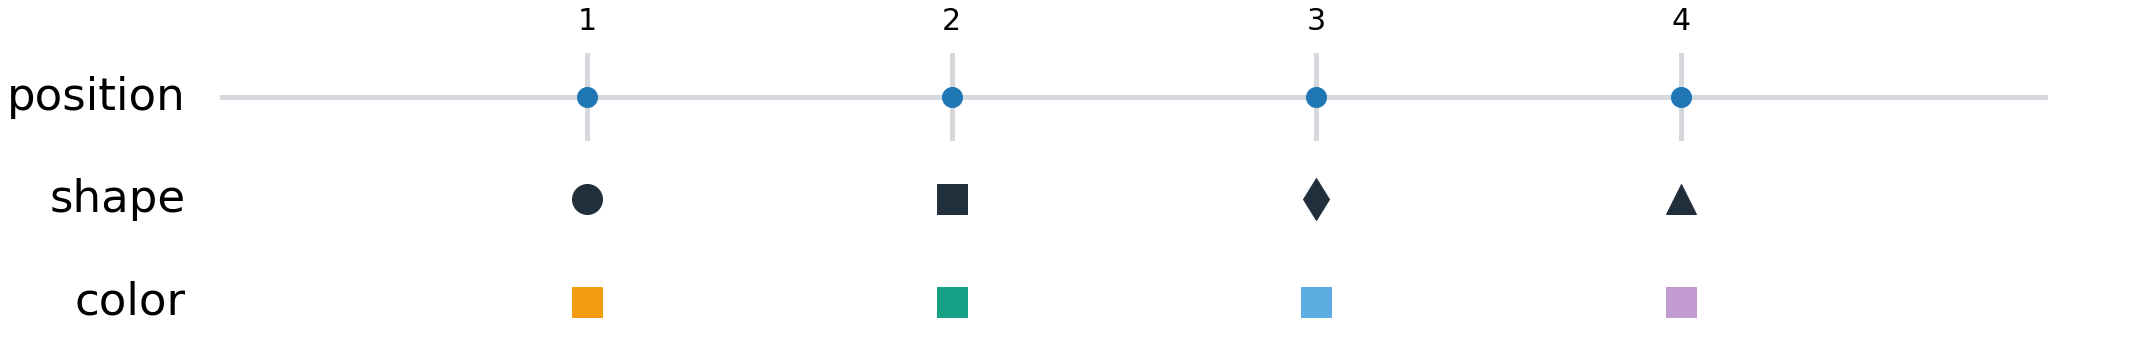

Figure 2.2: Scales link data values to aesthetics. Here, the numbers 1 through 4 have been mapped onto a position scale, a shape scale, and a color scale. For each scale, each number corresponds to a unique position, shape, or color and vice versa.


In [15]:
x = [i+1 for i in range(6)]
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(30,5))

# position
ax1.text(0.9,3,"position",fontsize=labelsize,ha="right",va="center")
ax1.plot(x,[3]*len(x),"-",linewidth=5,color=blurcolor)
for i in range(len(x[1:-1])):
    ax1.text(x[i+1],3.4,"{}".format(i+1),fontsize=30,ha="center")
    ax1.plot([x[i+1]]*2,[2.75,3.25],linewidth=5,color=blurcolor)
ax1.plot(x[1:-1],[3]*(len(x)-2),"o",markersize=20)
ax1.axis("off")

#shape
ax2.text(0.9,2,"shape",fontsize=labelsize,ha="right",va="center")
ax2.plot(x,[2]*len(x),"-",linewidth=5,color="#ffffff00")
for i in range(4):
    ax2.plot(x[i+1],2,markers[i],markersize=30,color = plaincolor)
ax2.axis("off")

#color
ax3.text(0.9,1,"color",fontsize=labelsize,ha="right",va="center")
colors = ["#F39C12","#16A085","#5DADE2","#C39BD3"]
ax3.plot(x,[1]*len(x),"-",linewidth=5,color="#ffffff00")
for i in range(len(colors)):
    ax3.plot(x[i+1],1,"s",markersize=30,color = colors[i])
ax3.axis("off");
plt.show()
print("Figure 2.2: Scales link data values to aesthetics. Here, the numbers 1 through 4 have been mapped onto a position scale, a shape scale, and a color scale. For each scale, each number corresponds to a unique position, shape, or color and vice versa.")

Visualize the data in **Table 2.2**

In [17]:
table2_2.head()

,station_id,month,day,temperature,flag,date
0,AQW00061705,1,1,82.4,C,-719528
1,AQW00061705,1,2,82.4,C,-719527
2,AQW00061705,1,3,82.4,C,-719526
3,AQW00061705,1,4,82.4,C,-719525
4,AQW00061705,1,5,82.4,C,-719524


In [18]:
import datetime

In [24]:
datetime.timedelta(seconds = -719528)

datetime.timedelta(-9, 58072)